# 1.Data Understanding 

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats


## Data Overview

In [2]:
data_path = os.path.join("data", "laptop_uncleaned.csv")
print(data_path)

data\laptop_uncleaned.csv


In [3]:
data = pd.read_csv(data_path)
data.shape

(2843, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2843 non-null   object 
 1   Brand             2810 non-null   object 
 2   Screen_Size       2756 non-null   object 
 3   CPU_Model         2628 non-null   object 
 4   Ram               2711 non-null   object 
 5   Operating_System  2723 non-null   object 
 6   Rating            2283 non-null   float64
 7   Series            2501 non-null   object 
 8   Color             2109 non-null   object 
 9   Resolution        182 non-null    object 
 10  Weight            66 non-null     object 
 11  USB               35 non-null     float64
 12  Battery           7 non-null      object 
 13  Graphics          2063 non-null   object 
 14  Disk_size         2248 non-null   object 
 15  Card_desc         2635 non-null   object 
 16  Price             1863 non-null   object 


In [5]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99


## Data Quality Check

In [6]:
data.duplicated().all().sum()

np.int64(0)

In [7]:
data.describe() # untuk data numeric


,Rating,USB
count,2283.000000,35.000000
mean,4.252168,2.371429
std,0.556563,0.770245
min,1.000000,1.000000
25%,4.000000,2.000000
50%,4.300000,3.000000
75%,4.500000,3.000000
max,5.000000,3.000000


## Data Cleaning

In [8]:
# menambah kolom price yang berisi nilai numerik dari harga tanpa simbol $.
data['price']=data['Price'].str.split('$').str.get(1)

In [9]:
data.sample(5, random_state=91)

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price,price
1570,2022 Newest HP Laptop with Microsoft Office In...,HP,15.6 Inches,Athlon Silver 3050U,16 GB,Windows 11 Home,4.2,NaN,Gold,NaN,NaN,NaN,NaN,AMD,1000 GB,Integrated,$549.99,549.99
2441,"ASUS Newest Vivobook 17.3"" HD+ Business Laptop...",ASUS,17.3 Inches,Intel Core i5,16 GB,Windows 11,5.0,ASUS VivoBook,NaN,NaN,NaN,NaN,NaN,Intel HD Graphics 5000,1 TB,Integrated,$579.00,579.00
2559,"ASUS VivoBook S15 S533 Thin and Light Laptop, ...",ASUS,15.6 Inches,Intel Core i7-1165G7,16 GB,Windows 11,NaN,VivoBook S15,Indie Black,NaN,NaN,NaN,NaN,Intel Iris Xe Graphics,NaN,Integrated,$832.96,832.96
2562,"ASUS VivoBook 15 Thin and Light Laptop, 15.6” ...",ASUS,15.6 Inches,Core i3-1005G1,8 GB,Windows 10 Home,4.5,VivoBook 15,Slate Gray,NaN,NaN,NaN,NaN,Intel UHD Graphics,128 GB,Integrated - 2020 Version,$333.99,333.99
1576,"HP Envy Laptop, 17.3"" IPS Touchscreen, Intel C...",HP,17.3 Inches,Intel Core i7,32 GB,Windows 11,NaN,Envy,NaN,NaN,NaN,NaN,NaN,Intel Iris Xe Graphics,1 TB,Integrated,"$1,299.00","1,299.00"


In [10]:
data.head()


,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price,price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99,359.99


In [11]:
data.nunique()

Title               2420
Brand                 52
Screen_Size           62
CPU_Model            180
Ram                   17
Operating_System      81
Rating                34
Series              1308
Color                242
Resolution            14
Weight                46
USB                    3
Battery                5
Graphics             292
Disk_size             46
Card_desc             69
Price                863
price                863
dtype: int64

In [12]:
#brmiss akan berisi semua baris dari data di mana kolom Brand kosong atau tidak ada nilainya.
brmiss=data[data['Brand'].isna()]

In [13]:
data.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price,price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99,359.99


In [14]:
# membuat kolom baru Brand di DataFrame brmiss, yang berisi kata pertama dari kolom Title setelah membaginya berdasarkan spasi. 
# Ini sering digunakan untuk mengekstrak merek atau informasi lain dari nama produk yang terdaftar dalam kolom Title.
brmiss.loc[:, 'Brand'] = brmiss['Title'].str.split(' ').str.get(0)


In [15]:
#menambahkan kolom baru Screen_Size di DataFrame brmiss, yang berisi ukuran layar yang diambil dari kolom Title berdasarkan pola yang ditentukan.
brmiss.loc[:, 'Screen_Size']=brmiss['Title'].str.extract(r'(\d{2}\.\d{1})\"')

In [16]:
#brmiss['Title'].iloc[6] akan memberikan nilai dari kolom Title di baris ke-6 (baris ketujuh) dari DataFrame brmiss.
brmiss['Title'].iloc[6]

'Acer Aspire 3 A315-24PT-R08Z Laptop | 15.6" FHD IPS Touch | AMD Ryzen 3 7320U | Radeon Graphics | 8GB LPDDR5 | 256GB SSD | Wi-Fi 6 | Windows 11 Home USB Type-C Dock D501, 60W PD'

In [17]:
# mengambil informasi tentang ukuran RAM dari kolom Title di brmiss, mengekstraknya dengan menggunakan pola regex, 
# dan kemudian memperbarui kolom Ram di DataFrame data untuk baris-baris yang sesuai dengan indeks brmiss
data.loc[brmiss.index,'Ram']=brmiss['Title'].str.extract(r'(\d{1,2}GB)')

In [18]:
data['Brand'].isna().sum()

np.int64(33)

In [19]:
data.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price,price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99,359.99


In [20]:
#menghapus baris-baris dari DataFrame data yang memiliki nilai NaN
data = data.dropna(subset=['Price','Brand','Screen_Size','Ram','Disk_size'])
data.isna().sum()

Title                  0
Brand                  0
Screen_Size            0
CPU_Model             17
Ram                    0
Operating_System       8
Rating               189
Series               136
Color                219
Resolution          1431
Weight              1440
USB                 1447
Battery             1448
Graphics             325
Disk_size              0
Card_desc             36
Price                  0
price                  0
dtype: int64

In [21]:
#menyaring DataFrame data sehingga hanya kolom-kolom yang tercantum dalam used_cols yang tersisa.
used_cols = ['Title','Brand','CPU_Model','Screen_Size','Ram','Rating','Disk_size','Price']
data = data[used_cols]

In [22]:
data.isna().sum()

Title            0
Brand            0
CPU_Model       17
Screen_Size      0
Ram              0
Rating         189
Disk_size        0
Price            0
dtype: int64

In [23]:
#memastikan bahwa semua nilai NaN dalam kolom Rating diganti dengan nilai 0
data['Rating'] = data['Rating'].fillna(0)


In [24]:
#Secara keseluruhan, kode ini digunakan untuk mengisi nilai NaN di kolom CPU_Model
cpu_pattern = r'(Intel\s*i\d|Core\s*i\d|Ryzen\s*\d|Radeon\s*R\d|Exynos\s*\d)'
miss=data[data['CPU_Model'].isna()]
data.loc[miss.index,'CPU_Model'] = data['Title'].str.extract(cpu_pattern)

In [25]:
data.isna().sum()

Title           0
Brand           0
CPU_Model      17
Screen_Size     0
Ram             0
Rating          0
Disk_size       0
Price           0
dtype: int64

In [26]:
data.head()


,Title,Brand,CPU_Model,Screen_Size,Ram,Rating,Disk_size,Price
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,Core i5,12.4 Inches,4 GB,3.9,256 GB,$359.99
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,Intel Core i5-1135G7,15.6 Inches,16 GB,4.3,256 GB,$818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,Ryzen 5,15.6 Inches,16 GB,4.5,512 GB,$699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,Intel Core i9,17.3 Inches,64 GB,5.0,2 TB,"$2,449.99"
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,Core i7 8750H,17.3 Inches,16 GB,5.0,1 TB,"$1,799.95"


In [27]:
#memproses kolom Screen_Size sehingga hanya bagian pertama dari setiap nilai, sebelum spasi, yang dipertahankan
data['Screen_Size']=data['Screen_Size'].str.split(' ').str.get(0)

In [28]:
data['Ram(Gb)']=data['Ram'].str.split(' ').str.get(0)

In [29]:
data['Disk_size']

4       256 GB
7       256 GB
8       512 GB
9         2 TB
10        1 TB
         ...  
2837     64 GB
2838     64 GB
2839     64 GB
2841     64 GB
2842     64 GB
Name: Disk_size, Length: 1448, dtype: object

In [30]:
#menampilkan semua baris dari DataFrame data di mana kolom Disk_size memiliki nilai '128 TB'
data[data['Disk_size']=='128 TB']

,Title,Brand,CPU_Model,Screen_Size,Ram,Rating,Disk_size,Price,Ram(Gb)
2361,2020 Newest Dell Inspiron 11 3195 2-in-1 11.6 ...,Dell,NaN,11.6,4 GB,4.1,128 TB,$239.00,4


In [31]:
#mengonversi ukuran disk dari satuan GB atau TB dalam kolom Disk_size menjadi ukuran dalam gigabyte (GB)
#dan menyimpannya dalam kolom baru Disk_Size_GB. Fungsi convert_to_gb menggunakan regex untuk mengekstrak 
#nilai dan satuan dari string ukuran disk, kemudian mengonversi ukuran sesuai dengan satuan yang ditemukan.
import re
def convert_to_gb(size_str):

    match = re.match(r'(\d+\.?\d*)\s*(GB|TB)?', size_str)
    if not match:
        return None



    value = float(match.group(1))
    unit = match.group(2) or 'GB'


    if unit == 'TB':
        return value * 1024
    elif unit == 'GB':
        return value
    else:
        return value

data['Disk_Size_GB'] = data['Disk_size'].apply(convert_to_gb)

In [32]:
data.head()

,Title,Brand,CPU_Model,Screen_Size,Ram,Rating,Disk_size,Price,Ram(Gb),Disk_Size_GB
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,Core i5,12.4,4 GB,3.9,256 GB,$359.99,4,256.0
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,Intel Core i5-1135G7,15.6,16 GB,4.3,256 GB,$818.00,16,256.0
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,Ryzen 5,15.6,16 GB,4.5,512 GB,$699.00,16,512.0
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,Intel Core i9,17.3,64 GB,5.0,2 TB,"$2,449.99",64,2048.0
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,Core i7 8750H,17.3,16 GB,5.0,1 TB,"$1,799.95",16,1024.0


In [33]:
#menghapus kolom Ram dan Disk_size dari DataFrame data
data.drop(['Ram','Disk_size'],inplace=True,axis=1)


In [34]:
data['Price']

4         $359.99
7         $818.00
8         $699.00
9       $2,449.99
10      $1,799.95
          ...    
2837      $419.99
2838      $262.99
2839      $262.99
2841      $262.99
2842      $254.99
Name: Price, Length: 1448, dtype: object

In [35]:
#mengonversi harga dari dolar AS ke rupiah Indonesia menggunakan nilai tukar yang sesuai, 
#dan hasilnya akan disimpan dalam kolom baru Price_IDR di DataFrame lap
usd_to_idr = 15.430   # Example exchange rate


def convert_to_idr(price_str):

    price_str = price_str.replace('$', '').replace(',', '')

    price_usd = float(price_str)
    price_inr = price_usd * usd_to_idr
    return price_inr

data['Price_IDR'] = data['Price'].apply(convert_to_idr)

In [36]:
# menghapus baris-baris dari DataFrame data di mana kolom CPU_Model memiliki nilai NaN.
indexx=data[data['CPU_Model'].isna()]
data.drop(index=indexx.index,inplace=True)

In [37]:
#memilih dan menampilkan baris dari DataFrame data di mana kolom CPU_Model mengandung string yang cocok dengan pola Core i5 atau Core i7,
#tanpa memperhatikan huruf besar atau kecil.
data[data['CPU_Model'].str.contains(r'\bCore i[57]\b', case=False, regex=True)]

,Title,Brand,CPU_Model,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_IDR
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,Core i5,12.4,3.9,$359.99,4,256.0,5554.6457
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,Intel Core i5-1135G7,15.6,4.3,$818.00,16,256.0,12621.7400
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,Core i7 8750H,17.3,5.0,"$1,799.95",16,1024.0,27773.2285
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,Intel Core i7,17.3,4.1,"$1,699.00",16,512.0,26215.5700
18,"2022 MSI Titan GT77 12UGS-009 (i7-12800HX, 32G...",EXCaliberPC,Core i7,17.3,5.0,"$3,295.00",32,4096.0,50841.8500
...,...,...,...,...,...,...,...,...,...
2837,"Microsoft Surface Laptop Go 12.4"" Light Weight...",Microsoft,Intel Core i5,12.4,3.0,$419.99,64,64.0,6480.4457
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,Core i5-1035G1,12.4,4.2,$262.99,4,64.0,4057.9357
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,Core i5-1035G1,12.4,4.2,$262.99,4,64.0,4057.9357
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,Core i5-1035G1,12.4,4.2,$262.99,4,64.0,4057.9357


In [38]:
data.isna().sum()

Title           0
Brand           0
CPU_Model       0
Screen_Size     0
Rating          0
Price           0
Ram(Gb)         0
Disk_Size_GB    0
Price_IDR       0
dtype: int64

In [39]:
#menampilkan baris dari DataFrame data di mana kolom CPU_Model berisi substring Core. 
#Ini mencakup semua variasi di mana Core muncul di dalam teks, seperti Core i5, Core i7, dan sebagainya.
data[data['CPU_Model'].str.contains('Core')]

,Title,Brand,CPU_Model,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_IDR
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,Core i5,12.4,3.9,$359.99,4,256.0,5554.6457
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,Intel Core i5-1135G7,15.6,4.3,$818.00,16,256.0,12621.7400
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,Intel Core i9,17.3,5.0,"$2,449.99",64,2048.0,37803.3457
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,Core i7 8750H,17.3,5.0,"$1,799.95",16,1024.0,27773.2285
11,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,EXCaliberPC,Intel Core i7,17.3,4.1,"$1,699.00",16,512.0,26215.5700
...,...,...,...,...,...,...,...,...,...
2837,"Microsoft Surface Laptop Go 12.4"" Light Weight...",Microsoft,Intel Core i5,12.4,3.0,$419.99,64,64.0,6480.4457
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,Core i5-1035G1,12.4,4.2,$262.99,4,64.0,4057.9357
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,Core i5-1035G1,12.4,4.2,$262.99,4,64.0,4057.9357
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,Core i5-1035G1,12.4,4.2,$262.99,4,64.0,4057.9357


In [40]:
#mengelompokkan jenis CPU ke dalam kategori 
#seperti i9, i7, i5, Ryzen, Celeron, i3, atau Other. Kemudian, kolom baru Cpu_Type ditambahkan ke DataFrame lap dengan hasil klasifikasi tersebut.
def categorize_cpu_model(text):
    text = text.lower()

    if 'i9' in text:
        return 'i9'
    elif 'i7' in text:
        return 'i7'
    elif 'i5' in text:
        return 'i5'
    elif 'ryzen' in text:
        return 'Ryzen'
    elif 'celeron' in text:
        return 'Celeron'
    elif 'i3' in text:
        return 'i3'
    else:
        return 'Other'

# Apply the categorization function
data['Cpu_Type'] = data['CPU_Model'].apply(categorize_cpu_model)

In [41]:
data['Cpu_Type'].value_counts()

Cpu_Type
i7         413
i5         276
Celeron    237
Ryzen      184
Other      163
i3         103
i9          55
Name: count, dtype: int64

In [42]:
data.head()


,Title,Brand,CPU_Model,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_IDR,Cpu_Type
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,Core i5,12.4,3.9,$359.99,4,256.0,5554.6457,i5
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,Intel Core i5-1135G7,15.6,4.3,$818.00,16,256.0,12621.7400,i5
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,Ryzen 5,15.6,4.5,$699.00,16,512.0,10785.5700,Ryzen
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,Intel Core i9,17.3,5.0,"$2,449.99",64,2048.0,37803.3457,i9
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,Core i7 8750H,17.3,5.0,"$1,799.95",16,1024.0,27773.2285,i7


In [43]:
#mereset indeks DataFrame lap ke urutan default (0, 1, 2, ...), menghapus indeks lama, dan menerapkan perubahan langsung pada DataFrame lap.
data.reset_index(drop=True,inplace=True)

In [44]:
#menghapus kolom 'CPU_Model' dari DataFrame data dan menerapkan perubahan langsung pada DataFra
data.drop('CPU_Model',axis=1,inplace=True)

In [45]:
data.head()

,Title,Brand,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_IDR,Cpu_Type
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,3.9,$359.99,4,256.0,5554.6457,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,4.3,$818.00,16,256.0,12621.7400,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,4.5,$699.00,16,512.0,10785.5700,Ryzen
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,5.0,"$2,449.99",64,2048.0,37803.3457,i9
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,5.0,"$1,799.95",16,1024.0,27773.2285,i7


In [46]:
data.shape

(1431, 9)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1431 non-null   object 
 1   Brand         1431 non-null   object 
 2   Screen_Size   1431 non-null   object 
 3   Rating        1431 non-null   float64
 4   Price         1431 non-null   object 
 5   Ram(Gb)       1431 non-null   object 
 6   Disk_Size_GB  1431 non-null   float64
 7   Price_IDR     1431 non-null   float64
 8   Cpu_Type      1431 non-null   object 
dtypes: float64(3), object(6)
memory usage: 100.7+ KB


In [48]:
#mengubah tipe data kolom Ram(Gb) di DataFrame data menjadi integer. 
data['Ram(Gb)'] = data['Ram(Gb)'].astype(int)


In [49]:
data.describe()

,Rating,Ram(Gb),Disk_Size_GB,Price_IDR
count,1431.000000,1431.000000,1.431000e+03,1431.000000
mean,3.727184,15.192872,1.313544e+03,15542.718684
std,1.518375,14.540726,2.706010e+04,14636.682145
min,0.000000,1.000000,1.000000e-02,601.461400
25%,3.900000,8.000000,1.280000e+02,5554.645700
50%,4.300000,12.000000,5.120000e+02,10337.945700
75%,4.500000,16.000000,1.024000e+03,20699.422150
max,5.000000,128.000000,1.024000e+06,101822.570000


In [50]:
data.to_csv('laptop_cleaned_final.csv', index=False)

# Exploratory Data Analysis

In [51]:
data.describe()

,Rating,Ram(Gb),Disk_Size_GB,Price_IDR
count,1431.000000,1431.000000,1.431000e+03,1431.000000
mean,3.727184,15.192872,1.313544e+03,15542.718684
std,1.518375,14.540726,2.706010e+04,14636.682145
min,0.000000,1.000000,1.000000e-02,601.461400
25%,3.900000,8.000000,1.280000e+02,5554.645700
50%,4.300000,12.000000,5.120000e+02,10337.945700
75%,4.500000,16.000000,1.024000e+03,20699.422150
max,5.000000,128.000000,1.024000e+06,101822.570000


In [57]:
data.head()

,Title,Brand,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_IDR,Cpu_Type
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,3.9,$359.99,4,256.0,5554.6457,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,4.3,$818.00,16,256.0,12621.7400,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,4.5,$699.00,16,512.0,10785.5700,Ryzen
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,5.0,"$2,449.99",64,2048.0,37803.3457,i9
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,5.0,"$1,799.95",16,1024.0,27773.2285,i7


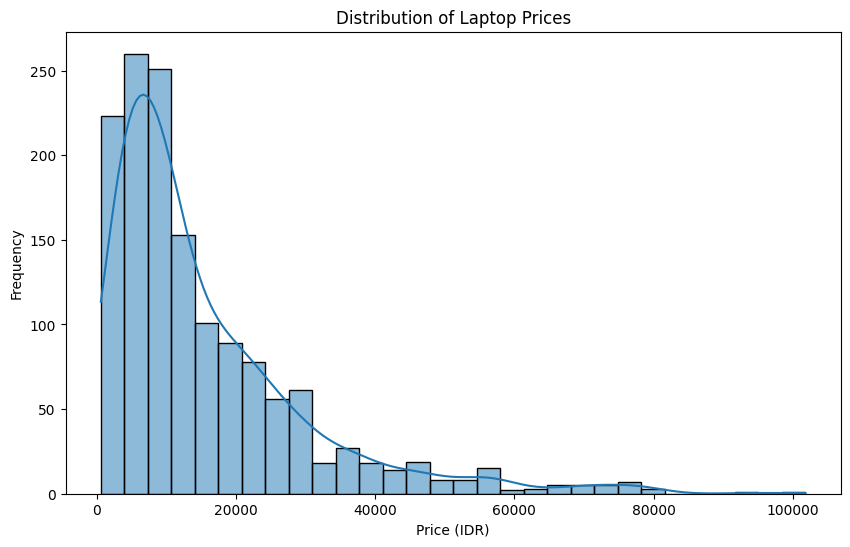

In [61]:
# Plot the distribution of laptop prices
# Plot the distribution of laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_IDR'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (IDR)')
plt.ylabel('Frequency')
plt.show()


<div style="text-align: justify;">
Ini adalah contoh teks yang diratakan secara justify. Dengan menggunakan HTML `div` dan properti CSS `text-align: justify;`, kamu bisa memastikan bahwa teks ini diratakan secara seimbang di kedua sisi.
</div>

### Beberapa poin penting dari grafik tersebut:

<div style="text-align: justify;">

* Distribusi Positif Skewed (Positively Skewed Distribution): Grafik ini menunjukkan distribusi yang miring ke kanan (positively skewed). Ini berarti sebagian besar laptop yang dianalisis memiliki harga yang lebih rendah, sedangkan harga yang lebih tinggi lebih jarang terjadi.

* Mayoritas Harga Laptop: Sebagian besar laptop berada pada kisaran harga di bawah 20 juta IDR, dengan frekuensi tertinggi pada sekitar 10 juta IDR.

* Harga Tinggi yang Jarang: Ada beberapa laptop dengan harga lebih tinggi (di atas 40 juta IDR), tetapi jumlahnya jauh lebih sedikit dibandingkan dengan laptop yang lebih murah.

* Secara keseluruhan, grafik ini memberikan gambaran tentang bagaimana harga laptop tersebar, dengan banyaknya laptop yang relatif terjangkau dan hanya sedikit yang sangat mahal.]
</div>

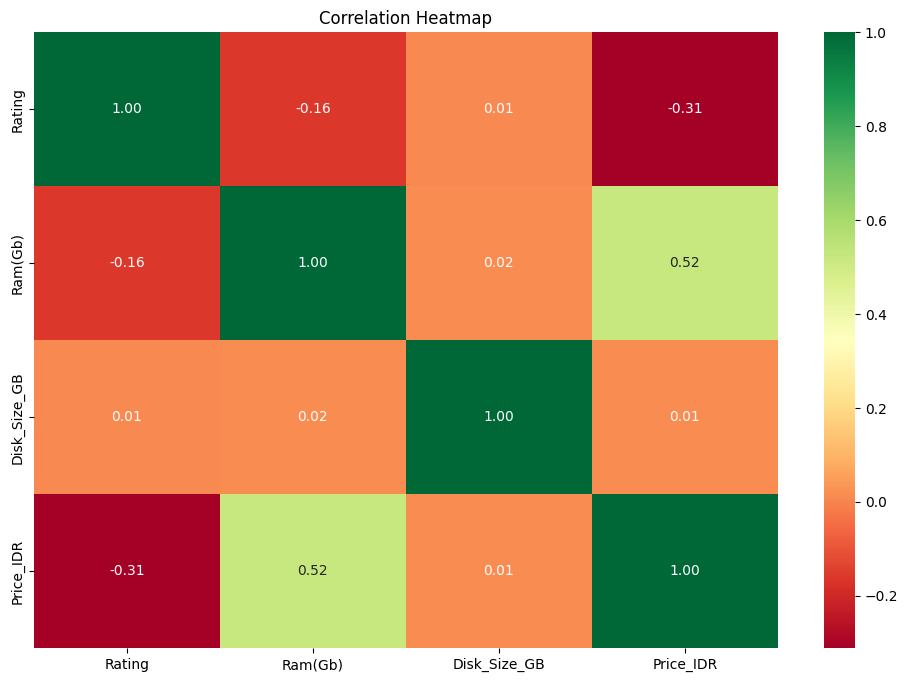

In [77]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Heatmap korelasi

<div style="text-align: justify;">
    Heatmap korelasi antara beberapa variabel, yaitu Rating, Ram(Gb), Disk_Size_GB, dan Price_IDR. Berikut adalah beberapa poin penting dari heatmap ini:


    Warna pada Heatmap:

* Warna hijau menunjukkan korelasi positif yang kuat.
* Warna merah menunjukkan korelasi negatif yang kuat.
* Warna oranye atau kuning menunjukkan korelasi yang lemah atau hampir tidak ada korelasi.

    Interpretasi Korelasi:

* Rating dan Ram(Gb):Korelasi negatif lemah (-0.16), menunjukkan bahwa rating laptop cenderung sedikit menurun dengan peningkatan kapasitas RAM, meskipun korelasi ini sangat lemah.
* Ram(Gb) dan Price_IDR: Korelasi positif sedang (0.52), menunjukkan bahwa harga cenderung meningkat dengan meningkatnya kapasitas RAM.
* Rating dan Price_IDR: Korelasi negatif sedang (-0.31), menunjukkan bahwa rating cenderung sedikit menurun dengan meningkatnya harga laptop.
* Disk_Size_GB: Tidak menunjukkan korelasi yang signifikan dengan variabel lainnya, dengan nilai korelasi yang sangat mendekati nol.
* Secara keseluruhan, heatmap ini digunakan untuk memahami hubungan linear antara variabel-variabel dalam dataset. Dalam hal ini, kapasitas RAM memiliki pengaruh yang paling signifikan terhadap harga laptop, sedangkan ukuran disk tidak memiliki pengaruh yang jelas terhadap harga, rating, atau kapasitas RAM. 

</div>

In [81]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1431 non-null   object 
 1   Brand         1431 non-null   object 
 2   Screen_Size   1431 non-null   object 
 3   Rating        1431 non-null   float64
 4   Price         1431 non-null   object 
 5   Ram(Gb)       1431 non-null   int64  
 6   Disk_Size_GB  1431 non-null   float64
 7   Price_IDR     1431 non-null   float64
 8   Cpu_Type      1431 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 100.7+ KB


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Prepare the data for modeling
X = data.drop(columns=['Price', 'Price_IDR'])
y = data['Price_IDR']

# Identify categorical and numerical columns
categorical_cols = ['Title', 'Brand', 'Cpu_Type']
numerical_cols = ['Screen_Size', 'Rating', 'Ram(Gb)', 'Disk_Size_GB']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Combine preprocessing and model into a single pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 106063685510.78915
R-squared: -526.8620956028168


['laptop_price_model.pkl']

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1431 non-null   object 
 1   Brand         1431 non-null   object 
 2   Screen_Size   1431 non-null   object 
 3   Rating        1431 non-null   float64
 4   Price         1431 non-null   object 
 5   Ram(Gb)       1431 non-null   int64  
 6   Disk_Size_GB  1431 non-null   float64
 7   Price_IDR     1431 non-null   float64
 8   Cpu_Type      1431 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 100.7+ KB


In [98]:
data.head()

,Title,Brand,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_IDR,Cpu_Type
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,3.9,$359.99,4,256.0,5554.6457,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,4.3,$818.00,16,256.0,12621.7400,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,4.5,$699.00,16,512.0,10785.5700,Ryzen
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,5.0,"$2,449.99",64,2048.0,37803.3457,i9
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,5.0,"$1,799.95",16,1024.0,27773.2285,i7


In [93]:
print(numeric_df.columns)


Index(['Rating', 'Ram(Gb)', 'Disk_Size_GB', 'Price_IDR'], dtype='object')


In [99]:
# Menghapus kolom 'Title' karena berisi deskripsi produk yang panjang
X = numeric_df.drop(columns=['Price_IDR'])  # Sesuaikan dengan kolom teks yang ingin dihapus
y = numeric_df['Price_IDR']

# Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melanjutkan dengan training model
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Membuat prediksi dan evaluasi
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 111984069.7959549
R-squared: 0.442673093321731


In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Definisikan fitur numerik dan kategorikal
numerical_cols = ['Rating', 'Ram(Gb)', 'Disk_Size_GB']
categorical_cols = ['Brand', 'Screen_Size', 'Cpu_Type']

# Praproses Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Siapkan pipeline dengan model dan preprocessor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data
X = data.drop(columns=['Price', 'Price_IDR'])
y = data['Price_IDR']  # Target yang ingin diprediksi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_

# Evaluasi model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Simpan model
joblib.dump(best_model, 'laptop_price_model.pkl')


Mean Squared Error: 53856754.54816514
R-squared: 0.7319634973907342


['laptop_price_model.pkl']

MSE (53,856,754.55): Ini menunjukkan rata-rata kesalahan kuadrat dalam prediksi harga. Meskipun masih relatif tinggi, angka ini lebih baik dibandingkan dengan MSE sebelumnya. Ini menunjukkan bahwa model yang saya buat sekarang lebih akurat dalam memprediksi harga laptop.

R-squared (0.732): Nilai ini menunjukkan bahwa model yang saya buat dapat menjelaskan sekitar 73.2% dari variasi harga dalam data. Ini merupakan indikasi yang baik bahwa model Anda berhasil menjelaskan sebagian besar pola dalam data